# Week 4 Assignment

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data set
from sklearn.datasets import load_wine

In [3]:
# load data
data, lable = load_wine(return_X_y=True)

In [4]:
# define function for visualization (3 classes)
def PlotPC1PC2(PCs, lable):
    
    fig = plt.figure(num = 1)
    ax1 = fig.add_subplot(111)

    for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
        ax1.scatter(PCs[lable == l, 0], PCs[lable == l, 1],
                color = c,
                label = 'class %s' % l,
                alpha = 0.5,
                marker = m)
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_title('Score Plot')
    plt.legend(loc = 'best')
    plt.show()

## Perform PCA Using Eigen Decomposition

In [5]:
# import package
from numpy import linalg as LA

In [6]:
# set data
X = data
# calculate data dimension N samples * M features 
N, M = X.shape
# subtract the mean of each feature (columns) for each feature in each sample (Mean = 0)
X -= np.mean(X, axis=0, keepdims=True)
# find the the standard deviation of each column and divide by this value (Std = 1)
X /= np.std(X, axis=0, keepdims=True)

In [7]:
# calculate the covariance matrix
covariance = 1/(N-1)*np.dot(X.T,X)
# find the eigenvectors and eigenvalues
eig_W, eig_V = LA.eig(covariance)
# sort the eigenvalues in decreasing order
ind = np.argsort(-eig_W)
# rearrange the order of eigenvectors and eigenvalues
PCs = eig_V[:,ind]
W = eig_W[ind]
# project the original data set to PC axis
X_T = np.dot(X,PCs)

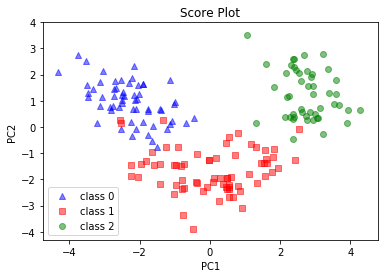

In [8]:
# plot figure
PlotPC1PC2(X_T, lable)

## Perform PCA Using SVD Decomposition

In [9]:
# set data
X = data
# calculate data dimension N samples * M features 
N, M = X.shape
# subtract the mean of each feature (columns) for each feature in each sample (Mean = 0)
X -= np.mean(X, axis=0, keepdims=True)
# find the the standard deviation of each column and divide by this value (Std = 1)
X /= np.std(X, axis=0, keepdims=True)

In [10]:
# SVD decomposition
U,s,V = np.linalg.svd(X)
# reconstruct S into N*M
S = np.zeros((N,M))
S[:len(s), :len(s)] = np.diag(s)
# project the original data set to PC axis
X_T = np.dot(U,S)

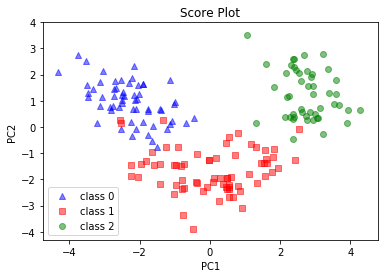

In [11]:
# plot figure
PlotPC1PC2(X_T, lable)

## Perform PCA Using sklearn

In [12]:
# import packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
# set data
X = data
# standardizing the data
X = StandardScaler().fit_transform(X)

In [14]:
# fit a PCA
pca = PCA()
# project the original data set to PC axis
# X_T = np.dot(X,pca.components_.T)
X_T = pca.fit_transform(X)

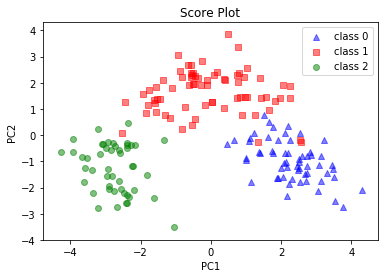

In [15]:
# plot figure
PlotPC1PC2(X_T, lable)

## Select PCs

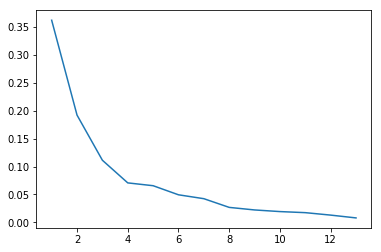

In [16]:
# Now we will plot the percent of variance that each component describes according to the sorted eigenvalues of X'X
# We generate the eigenvalues from the singular values, s: lamda = s**2/N-1
# Generate an array of the eigenvalues scaled such that their sum = 1.
eigenvalues = s**2/(N-1)
scaled_eigenvalues = eigenvalues/np.sum(eigenvalues)

# Making the scree plot
_ = np.arange(len(s)) + 1
plt.plot(_, scaled_eigenvalues)
# plt.plot(_, pca.explained_variance_ratio_)
plt.show()

In [17]:
def describe_variance(scaled_eigenvalues, thresh):
    #---INSERT CODE HERE--- Finish the function to show how many principal components it takes to describe a 
    # certain percentage of the variance in the dataset given by thresh
    eig_sum = 0
    for i in range(len(scaled_eigenvalues)):
        eig_sum += scaled_eigenvalues[i]
        if eig_sum >= thresh:
            break
    print(str(eig_sum*100) + '% of the variance is described by ' + str(i+1) + ' components.')

In [18]:
# run the function, use a thresh = 0.95
describe_variance(scaled_eigenvalues, thresh = 0.95)

96.16971684450644% of the variance is described by 10 components.


In [19]:
# generate a reduced dimension dataset based on the number of features it takes to describe 90% of the variance
pca = PCA(0.90).fit(X)
# calculate how many PCs need to select 
X_reduced = pca.transform(X)
print('Need to select ' + str(pca.n_components_) + ' PCs to describe 90% of the variance of the dataset.')
# inverse transformation
# Y = pca.inverse_transform(X_reduced) # + pca.mean_

Need to select 8 PCs to describe 90% of the variance of the dataset.


In [21]:
# generate a .csv file of the reduced dimension array with NO HEADERS and NO ROW LABELS
import pandas as pd 
df = pd.DataFrame(X_reduced)
df.to_csv("YWang_04.csv", header=False, index=False)